In [1]:
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set()


In [2]:
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

library = "https://kdl.bibliocommons.com/list/share/1709633629_kdl_earlyliteracy/1992750309_picture_books_for_grateful_readers"

response = get(library, headers=headers)

In [3]:
print(response)

print(response.text[:1000])

<Response [200]>
<!-- APPLICATION LAYOUT -->





<!DOCTYPE html>
<html xmlns:og="http://ogp.me/ns#" lang="en-US">
<head>
  <!-- Data Layer -->
<script>
  window.dataLayer = window.dataLayer || [{"bc.siteId":"MI-KENT-KDL","bc.libraryId":174,"bc.localBranch":null,"bc.shortName":"KDL","bc.longName":"Kent District Library","bc.domain":"kdl","bc.externalGaId":"UA-1801889-1","bc.gaCrossDomainNames":[],"bc.gaCrossDomainEnabled":true,"bc.cmsEnabled":true,"bc.cmsUrl":"https://kdl.org","bc.crazyEggId":"00178067","bc.allowGoogleAdFeatures":false,"bc.product":"core","bc.branch":null,"bc.version":"Version 9.3.4 Last updated 2021/11/09 12:49 [cor-liv-app06]"}];
</script>
<!-- end Data Layer -->
<!-- Start Google Tag Manager-->
<script>(function(w,d,s,l,i)
{
  w[l]=w[l]||[];w[l].push({'gtm.start': new Date().getTime(),event:'gtm.js'});
  
  var f=d.getElementsByTagName(s)[0], j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';
  
  j.async=true;
  j.src='https://www.googletagmanager.com/gtm.js?id='+i

In [4]:
html_soup = BeautifulSoup(response.text, 'html.parser')

results = html_soup.find('div', class_="row body_block")
# print(results.prettify())

book_elements = results.find_all('div', class_="listItem bg_white col-xs-12")


# def save_html(html, path):
#     with open(path, 'wb') as f:
#         f.write(html)
# save_html(r.content, 'KDL Library')

In [5]:
for book_element in book_elements:
    title_element = book_element.find('div', class_="list_item_title")
    author_element = book_element.find('div', class_="list_item_author")
    format_element = book_element.find('div', class_="list_item_format")
    available_element = book_element.find('span', class_="label availability")
    print(title_element)
    print(author_element)
    print(format_element)
    print(available_element)
    print()



<div class="list_item_title">
<a data-analytics='{"event":"bc.clickOnBibTitleLink","payload":{"gtmCategory":"v2-page-interactions","gtmAction":"v2-title-click","gtmLabel":"bib-title","gtmValue":1}}' href="/item/show/749994174">What I Like Most</a>
</div>
<div class="list_item_author">
            by <a data-analytics='{"event":"bc.clickOnAuthorLink","payload":{"gtmCategory":"v2-page-interactions","gtmAction":"v2-link-click","gtmLabel":"bib-author","gtmValue":1}}' href="/search?q=%22Murphy%2C+Mary%22&amp;search_category=author&amp;t=author" target="_parent" testid="author_search">Murphy, Mary</a>
<br/>
</div>
<div ?="" class="list_item_format">
<i aria-hidden="true" class="icon-book-open"></i>
          Picture Book - 2020<br/>
</div>
<span class="label availability">
<span class="item_available" role="presentation" testid="item_availability">Available </span>
<a class="circInfo value underlined location_info" data-analytics='{"event":"bc.checkAvailability","payload":{"gtmCategory":"v2-

In [6]:
for book_element in book_elements:
    title_element = book_element.find('div', class_="list_item_title")
    author_element = book_element.find('div', class_="list_item_author")
    format_element = book_element.find('div', class_="list_item_format")
    available_element = book_element.find('span', class_="label availability")
    print(title_element.text)
    print(author_element.text)
    print(format_element.text)
    print(available_element.text)
    print()



What I Like Most


            by Murphy, Mary




          Picture Book - 2020


Available 
in some locations



Look and Be Grateful


            by DePaola, Tomie




          Board Book - 2019


Available 
in some locations



The Thank You Book


            by Ray, Mary Lyn




          Picture Book - 2018


All copies in use 
Availability details



Thank You Bees


            by Yuly, Toni




          Board Book - 2020


Available 
in some locations



Apple Cake


            by Casey, Dawn




          Picture Book - 2019


Available 
in some locations



Thankful


            by Spinelli, Eileen




          Picture Book - 2015


All copies in use 
Availability details



Sometimes It's Hard to Be Nice


            by Rudd, Maggie




          Picture Book - 2021


Available 
in some locations



Bear Says Thanks


            by Wilson, Karma




          Picture Book - 2012


All copies in use 
Availability details



All of Me!


            by Bang, Molly



In [48]:
data = []

for book_element in book_elements:
    title_element = book_element.find('div', class_="list_item_title")
    author_element = book_element.find('div', class_="list_item_author")
    format_element = book_element.find('div', class_="list_item_format")
    available_element = book_element.find('span', class_="label availability")
    print(title_element.text.strip())
    print(author_element.text.strip())
    print(format_element.text.strip())
    print(available_element.text.strip())
    print()
    data.append()



What I Like Most
by Murphy, Mary
Picture Book - 2020
Available 
in some locations

Look and Be Grateful
by DePaola, Tomie
Board Book - 2019
Available 
in some locations

The Thank You Book
by Ray, Mary Lyn
Picture Book - 2018
All copies in use 
Availability details

Thank You Bees
by Yuly, Toni
Board Book - 2020
Available 
in some locations

Apple Cake
by Casey, Dawn
Picture Book - 2019
Available 
in some locations

Thankful
by Spinelli, Eileen
Picture Book - 2015
All copies in use 
Availability details

Sometimes It's Hard to Be Nice
by Rudd, Maggie
Picture Book - 2021
Available 
in some locations

Bear Says Thanks
by Wilson, Karma
Picture Book - 2012
All copies in use 
Availability details

All of Me!
by Bang, Molly
Picture Book - 2009
Available 
in some locations

Lala's Words
by Zhang, Gracey
Picture Book - 2021
Available 
in some locations

The Thankful Book
by Parr, Todd
Board Book - 2018
Available 
in some locations

A Small Kindness
by McAnulty, Stacy
Picture Book - 2021
All co

""


In [8]:
picture_books = results(text=lambda t: "Picture Book" in t)
print(len(picture_books))

10


In [9]:
board_book = results(text=lambda t: "Board Book" in t)
print(len(board_book))

3


In [10]:
available_books = results(text=lambda t: "Available" in t)
print(len(available_books))

9


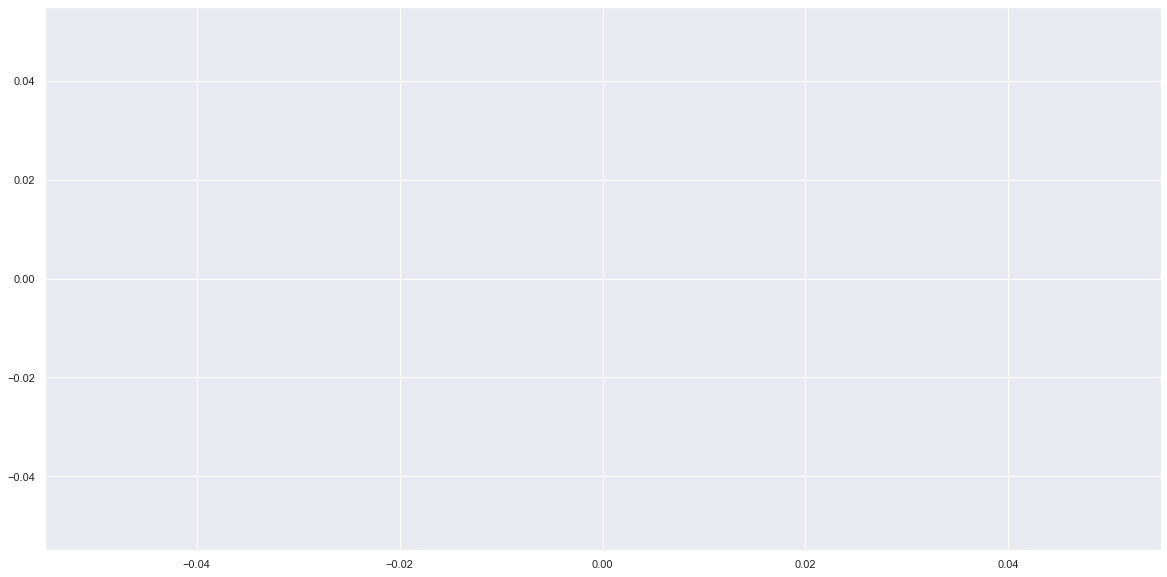